In [1]:
%matplotlib inline
from pylab import *

In [2]:
from deficit_defs import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit
Base Image File: asdf/bbsk081604_all_log2dog.asdf


In [3]:
def mydisplay(t,sim,neurons,connections):
    global _fig
    from IPython.display import display, clear_output
    from pylab import figure,close,gcf
    try:
        clear_output(wait=True)

        _fig=pn.utils.plot_rfs_and_theta(sim,neurons,connections)
        _fig.suptitle("%.2f" % (t/hour))
        display(_fig)
        close(_fig)
    except KeyboardInterrupt:
        close(_fig)
        raise


In [4]:
base='sims/2023-01-27'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

In [5]:
rf_size=19
#eta_mat=linspace(1e-7,5e-6,11)
eta=2e-6
blur_mat=linspace(0,8,17)
mu_c_mat=linspace(0,20,9)
sigma_c=1

print(blur_mat)
print(mu_c_mat)
number_of_neurons=20
number_of_processes=4

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8. ]
[ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20. ]


In [16]:
base_image_file='asdf/bbsk081604_all.asdf'
print("Base Image File:",base_image_file)

normal_image=pi5.filtered_images(
                                base_image_file,
                                {'type':'Rtodog','sd1':1,'sd2':3},
                                )


 [#############################100% (ETA: 0.0 s)#############################]
Saving cache_images/cache_images_1857bf3a3127ab742afd39fd2a2fc5e5.asdf...Resolution float64 -> uint16
done.


In [17]:
blur=[0.1,-1]
noise=[0.1,.1]
rf_size=19
eta=2e-6
mu_c=0
sigma_c=0    
mu_r=0
sigma_r=0
number_of_neurons=2
total_time=8*day
save_interval=1*hour

    
images=[]
dt=200*ms

for bv in blur:
    if bv<=0:
        im=pi5.filtered_images(
                            base_image_file,
                            {'type':'Rtodog','sd1':1,'sd2':3},
                            )
    else:
        im=pi5.filtered_images(
                                base_image_file,
                                {'type':'blur','size':bv},
                                {'type':'Rtodog','sd1':1,'sd2':3},
                                )
    images.append(im)


dt=200*ms        
pre1=pn.neurons.natural_images_with_jitter(images[0],
                                            rf_size=rf_size,
                                            time_between_patterns=dt,
                                            sigma_r=0,
                                            sigma_c=0,
                                            buffer_c=mu_c+2*sigma_c,
                                            buffer_r=mu_r+2*sigma_r,
                                            verbose=False)

pre2=pn.neurons.natural_images_with_jitter(images[1],
                                            rf_size=rf_size,
                                            other_channel=pre1,
                                            time_between_patterns=dt,
                                            mu_r=mu_r,mu_c=mu_c,
                                            sigma_r=sigma_r,sigma_c=sigma_c,
                                            verbose=False)



sigma=noise[0]
pre1+=pn.neurons.process.add_noise_normal(0,sigma)

sigma=noise[1]
pre2+=pn.neurons.process.add_noise_normal(0,sigma)

pre=pre1+pre2

post=default_post(number_of_neurons)
c=default_bcm(pre,post)
c.eta=eta

sim=pn.simulation(total_time)
sim.dt=dt

sim.monitor(post,['output'],save_interval)
sim.monitor(c,['weights','theta'],save_interval)

sim+=pn.grating_response(print_time=False)


seq=pn.Sequence()
seq+=sim,[pre,post],[c]

 [#############################100% (ETA: 0.0 s)#############################]
Saving cache_images/cache_images_d4acd532552a757f3e828b55a45079c9.asdf...Resolution float64 -> uint16
done.
Using cache_images/cache_images_1857bf3a3127ab742afd39fd2a2fc5e5.asdf from cache.

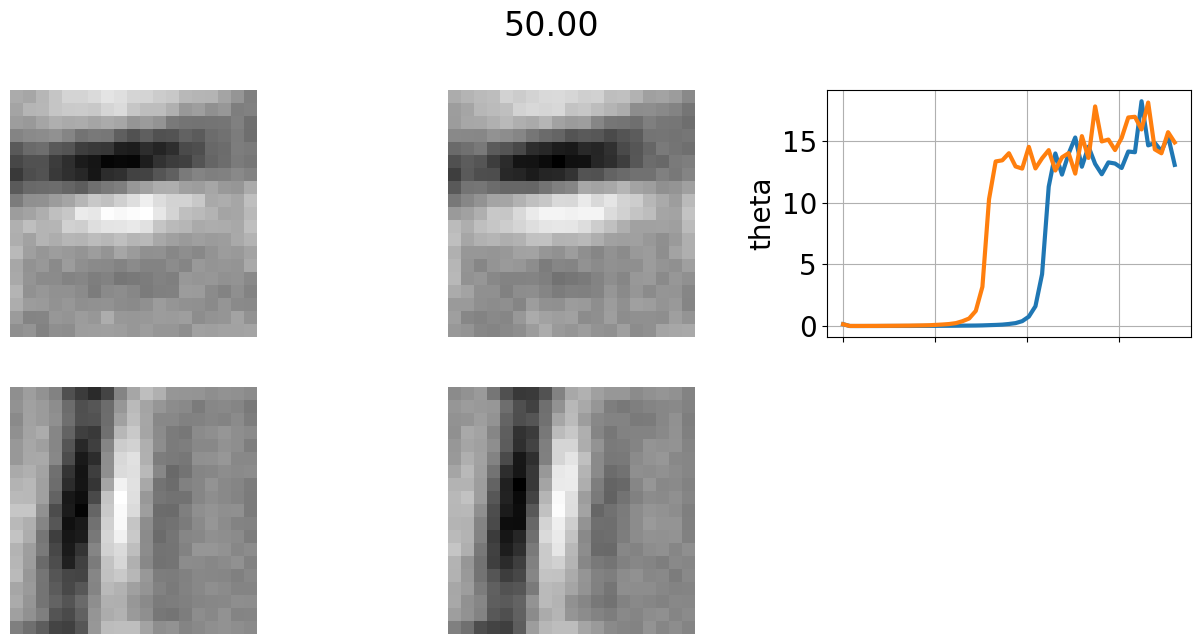

CPU times: user 42.2 s, sys: 4.36 s, total: 46.5 s
Wall time: 34.8 s


In [18]:
%%time
try:
    seq.run(display=mydisplay,display_hash=False,
               time_between_display=save_interval)
    #seq.run(display_hash=False)    
except KeyboardInterrupt:
    close()
    


/Users/bblais/tmp/ipykernel_9684/348590529.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar()


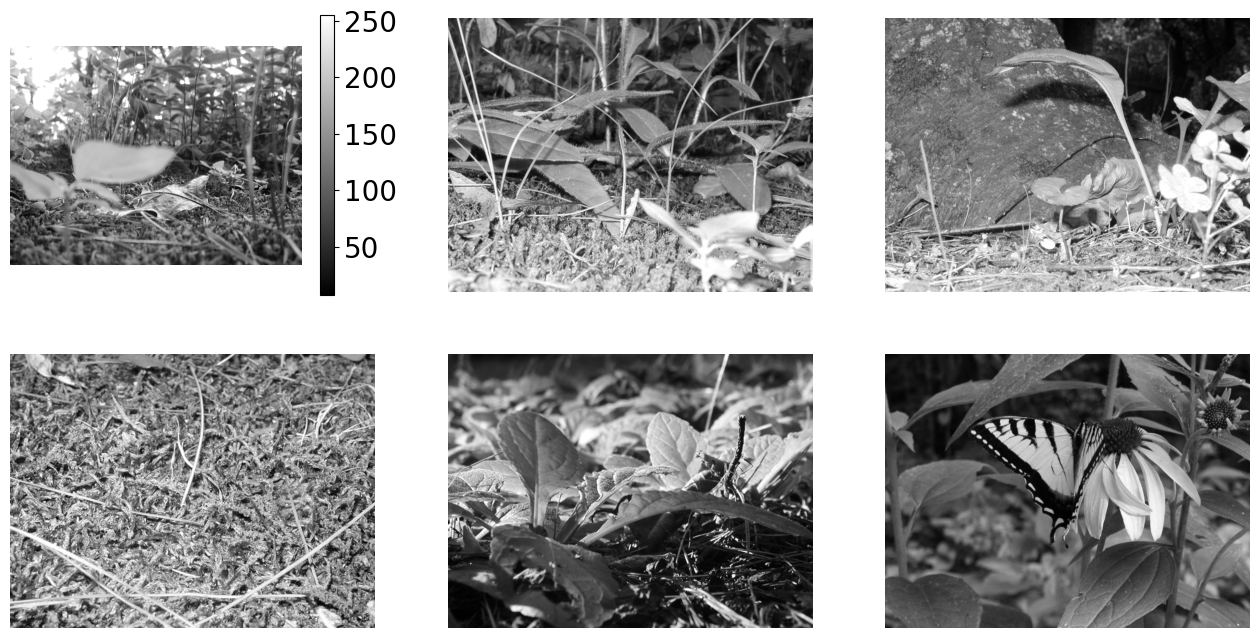

In [7]:
fname='asdf/bbsk081604_all.asdf'
image_data=pi5.asdf_load_images(fname)
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]
del image_data
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(im[i],cmap=plt.cm.gray)
    plt.axis('off')
    if i==0:
        colorbar()
    

/Users/bblais/tmp/ipykernel_9684/2032279588.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar()


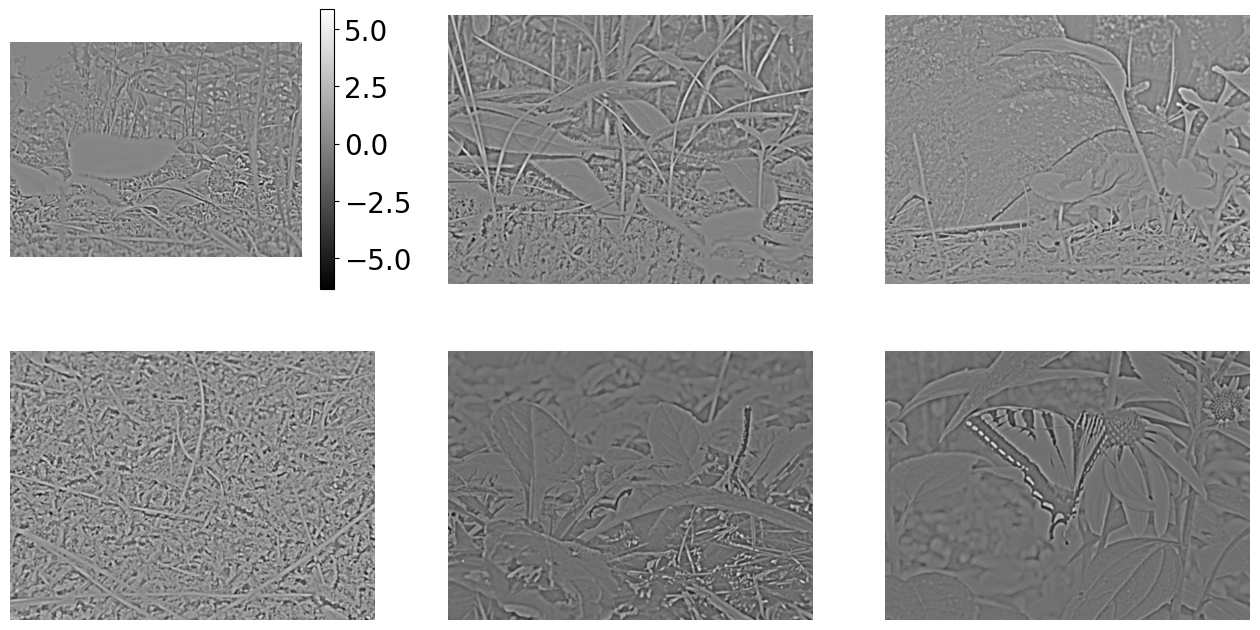

In [8]:
fname='asdf/bbsk081604_all_RtoDOG.asdf'
image_data=pi5.asdf_load_images(fname)
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]
del image_data
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(im[i],cmap=plt.cm.gray)
    plt.axis('off')
    if i==0:
        colorbar()
    

Using cache_images/cache_images_a629739df7cfc394ba42aee35cd33bef.asdf from cache.

/Users/bblais/tmp/ipykernel_9684/3457971448.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar()


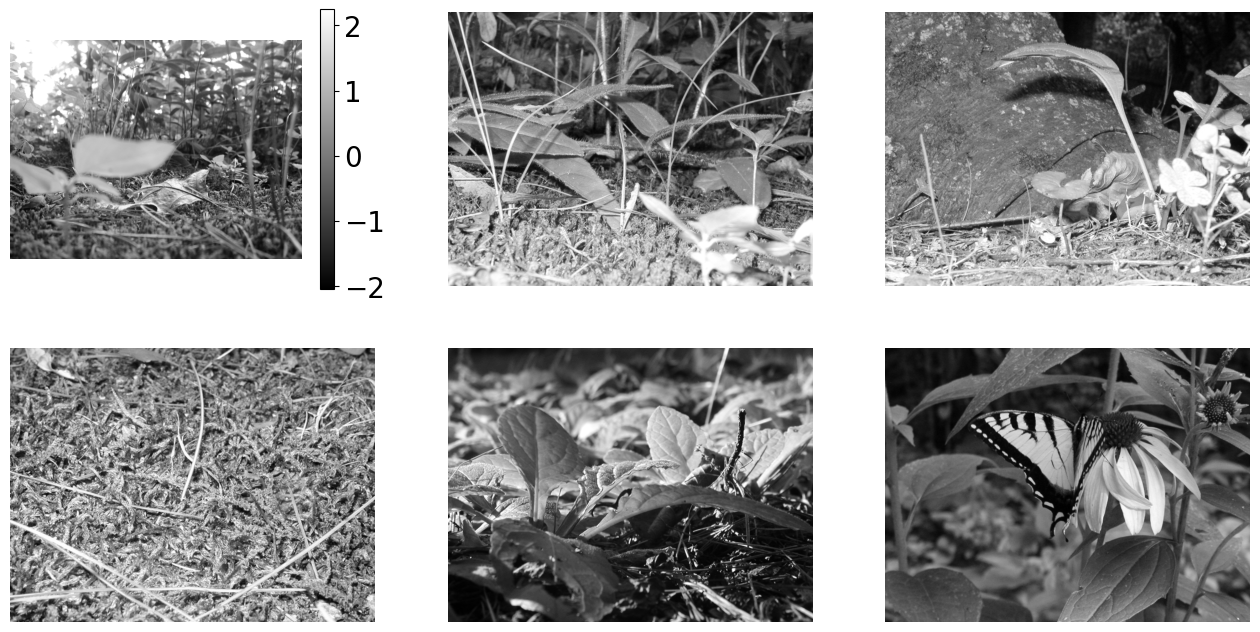

In [9]:
fname=pi5.filtered_images(
                    base_image_file,
                    {'type':'norm'},
                    )
image_data=pi5.asdf_load_images(fname)
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]
del image_data
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(im[i],cmap=plt.cm.gray)
    plt.axis('off')
    if i==0:
        colorbar()
    

Using cache_images/cache_images_1857bf3a3127ab742afd39fd2a2fc5e5.asdf from cache.

/Users/bblais/tmp/ipykernel_9684/726722413.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar()


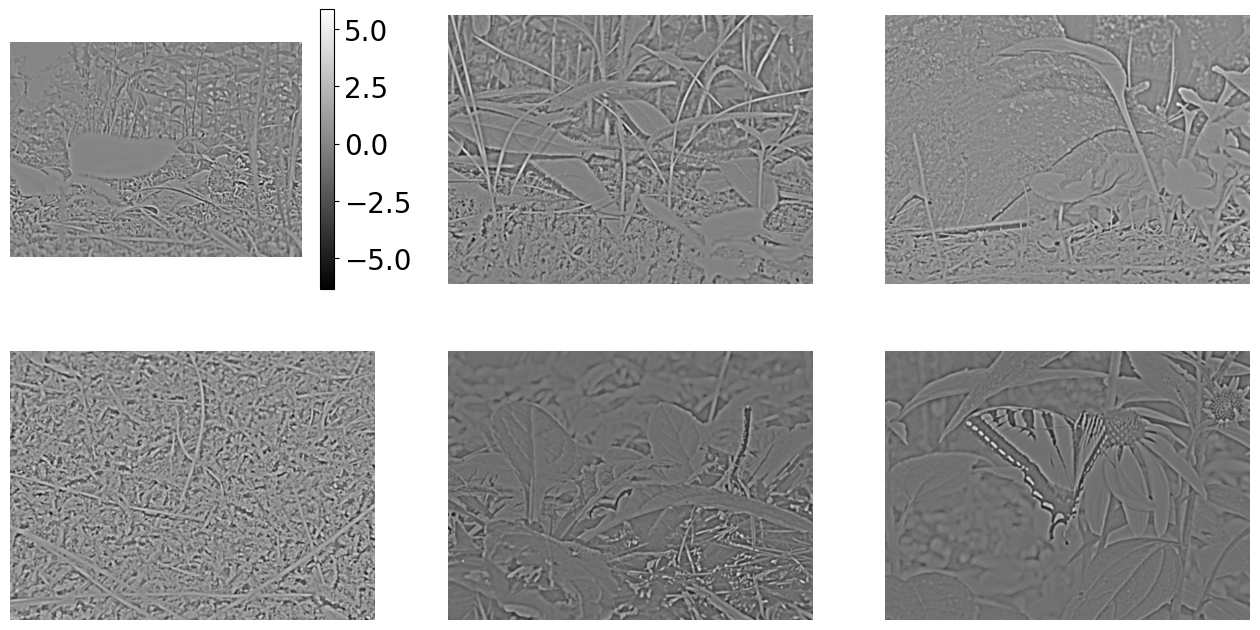

In [10]:
fname=pi5.filtered_images(
                    base_image_file,
                    {'type':'Rtodog','sd1':1,'sd2':3},
                    )
image_data=pi5.asdf_load_images(fname)
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]
del image_data
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(im[i],cmap=plt.cm.gray)
    plt.axis('off')
    if i==0:
        colorbar()
    

Using cache_images/cache_images_b3d5823cf05972555951f07f1ba3acac.asdf from cache.

/Users/bblais/tmp/ipykernel_9684/2375957257.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar()


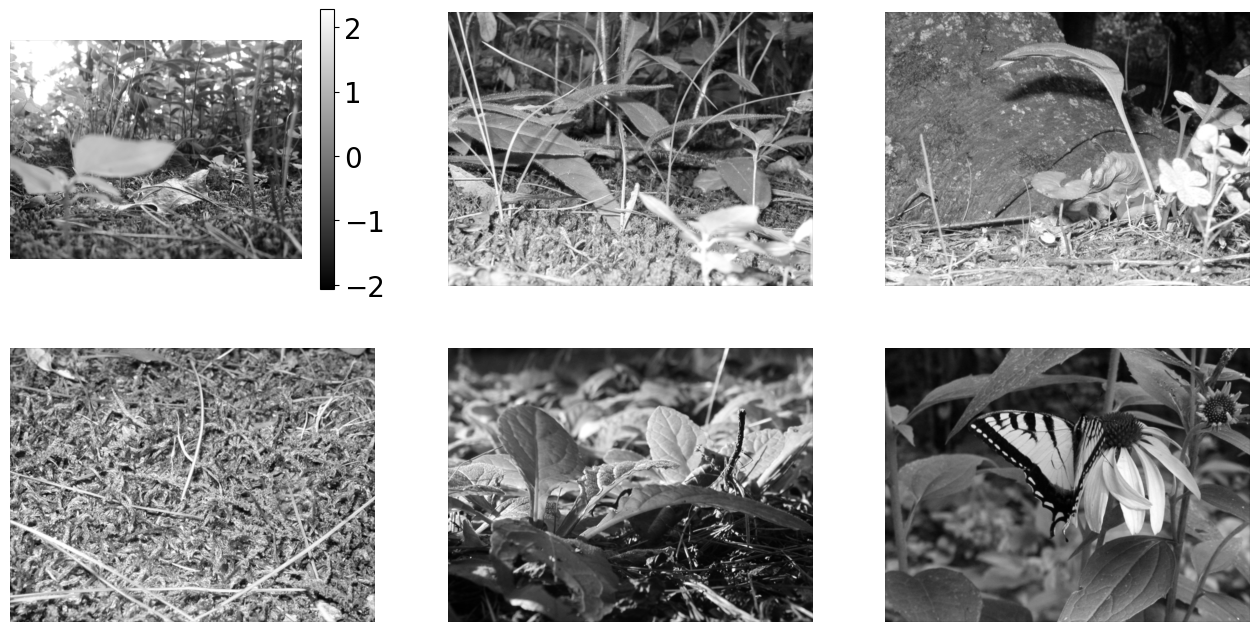

In [11]:
bv=0.5
fname=pi5.filtered_images(
                        base_image_file,
                        {'type':'blur','size':bv},
#                        {'type':'Rtodog','sd1':1,'sd2':3},
                        )
image_data=pi5.asdf_load_images(fname)
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]
del image_data
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(im[i],cmap=plt.cm.gray)
    plt.axis('off')
    if i==0:
        colorbar()
    

 [#############################100% (ETA: 0.0 s)#############################]
Saving cache_images/cache_images_b5260a31c461d93ed57acb3e74ec00b0.asdf...Resolution float64 -> uint16
done.


/Users/bblais/tmp/ipykernel_9684/329287437.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar()


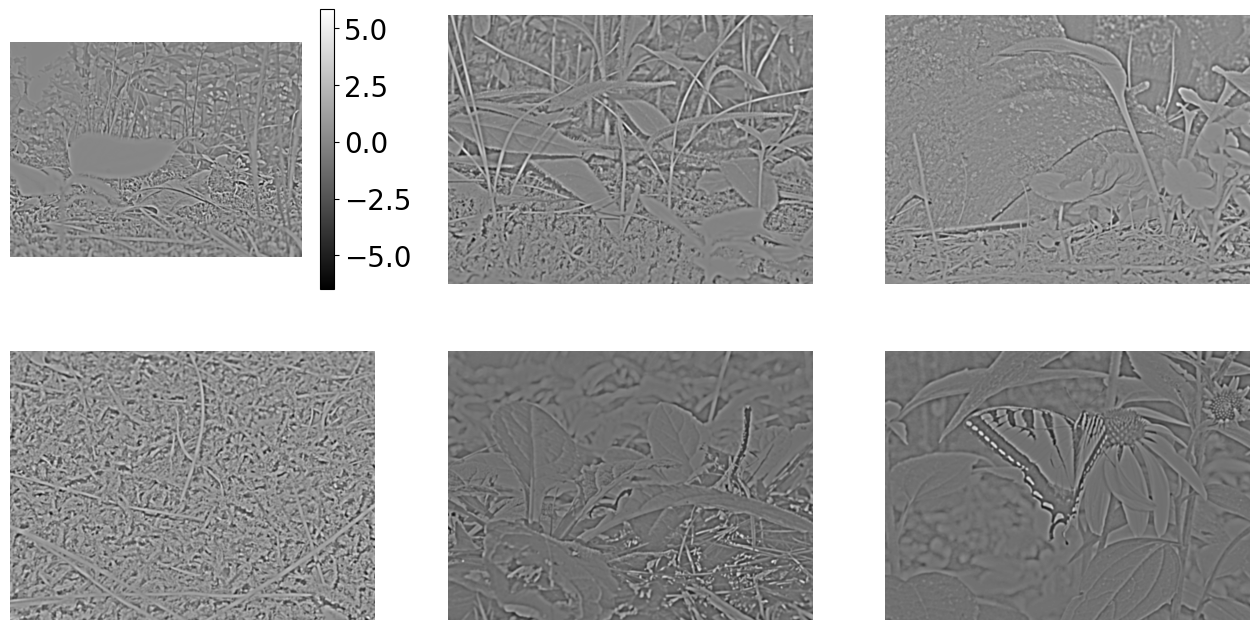

In [12]:
bv=0.5
fname=pi5.filtered_images(
                        base_image_file,
                        {'type':'blur','size':bv},
                        {'type':'Rtodog','sd1':1,'sd2':3},
    cache=False,
                        )
image_data=pi5.asdf_load_images(fname)
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]
del image_data
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(im[i],cmap=plt.cm.gray)
    plt.axis('off')
    if i==0:
        colorbar()
    

In [18]:
import filters

 [#############################100% (ETA: 0.0 s)#############################]


/Users/bblais/tmp/ipykernel_3885/1082038679.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar()


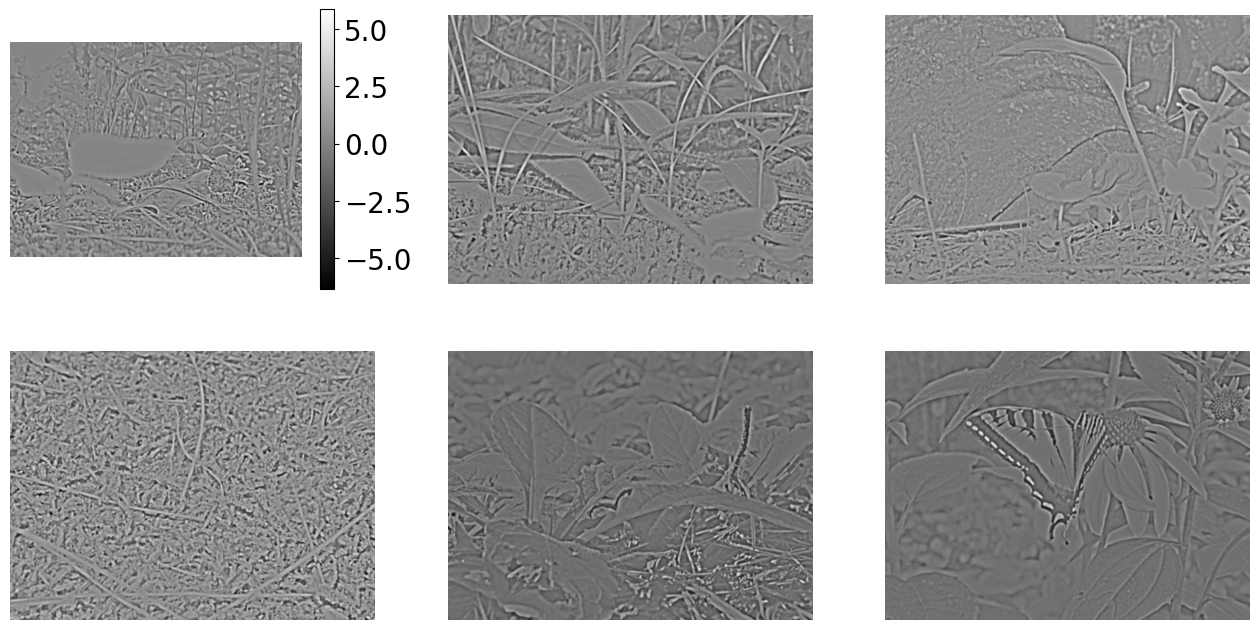

In [19]:
fname='asdf/bbsk081604_all.asdf'
print(fname)
image_data=pi5.asdf_load_images(fname)
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]


im=[I/(I.mean()+I) for I in im]
var_R={'im':im,'im_scale_shift':[1.0,0.0]}
var_norm=filters.make_norm(var_R)
var_dog=filters.make_dog(var_norm)

image_data=var_dog
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]
del image_data
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(im[i],cmap=plt.cm.gray)
    plt.axis('off')
    if i==0:
        colorbar()

## maybe this will work

In [7]:
def argmax_rc(X):
    """Return the row and col of the maximum value"""
    r,c=np.unravel_index(np.argmax(X), X.shape)
    return r,c

In [10]:

#fname=pi5.filtered_images('asdf/bbsk081604_all_RtoDOG.asdf')
fname=pi5.filtered_images(
                    base_image_file,
                    {'type':'Rtodog','sd1':1,'sd2':3},
                    )



pre1=pn.neurons.natural_images(fname,
                               rf_size=19,verbose=False)

pre2=pn.neurons.natural_images(fname,rf_size=19,
                            other_channel=pre1,
                            verbose=False)

pre1+=pn.neurons.process.add_noise_normal(0,0.1) # a little noise
pre2+=pn.neurons.process.add_noise_normal(0,0.1) # a little noise


pre=pre1+pre2

number_of_neurons=5
post=pn.neurons.linear_neuron(number_of_neurons)
post+=pn.neurons.process.sigmoid(0,50)

c=pn.connections.BCM(pre,post,[-.01,.01],[.1,.2])
c+=pn.connections.process.orthogonalization(10*minute)
c.eta=2e-6
c.tau=15*minute   

sim=pn.simulation(4*day)
sim.dt=200*ms

save_interval=30*minute
sim.monitor(post,['output'],save_interval)
sim.monitor(c,['weights','theta'],save_interval)

sim+=pn.grating_response()

pn.run_sim(sim,[pre,post],[c],display_hash=True,print_time=True)
pn.save('sims/nr.asdf',sim,[pre,post],[c])
R=Results('sims/nr.asdf')

 [#############################99% (ETA: 0.5 s)############################# ]Grating time elapsed 7.30 s
Sim Time Elapsed...57.35 s


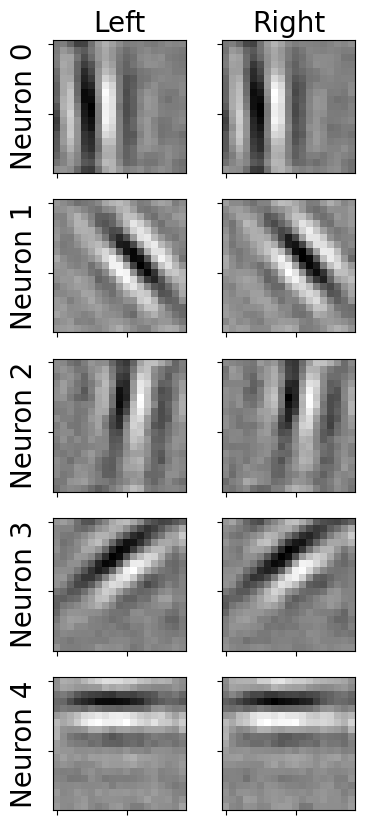

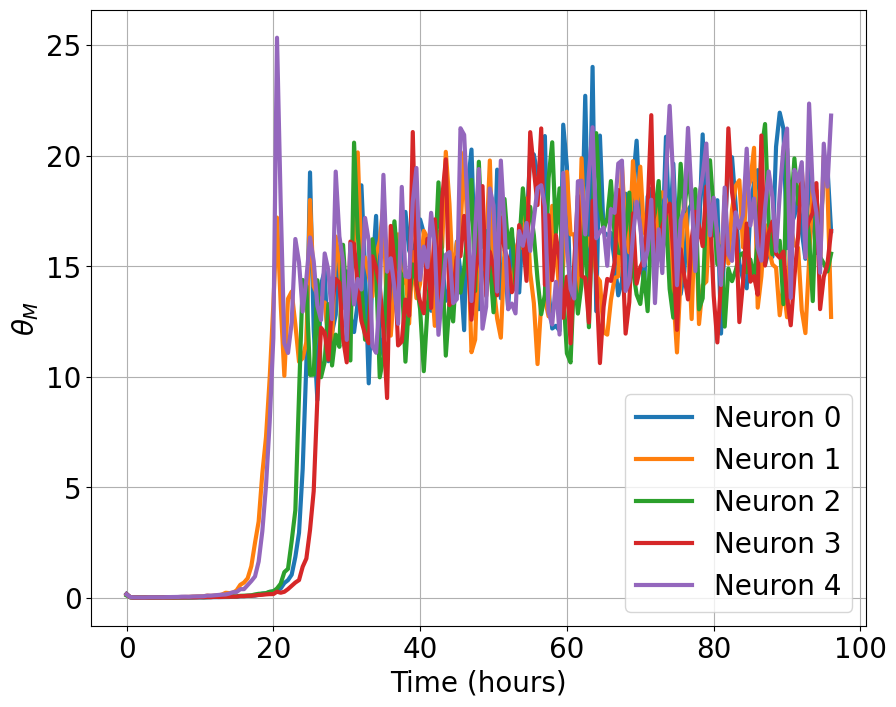

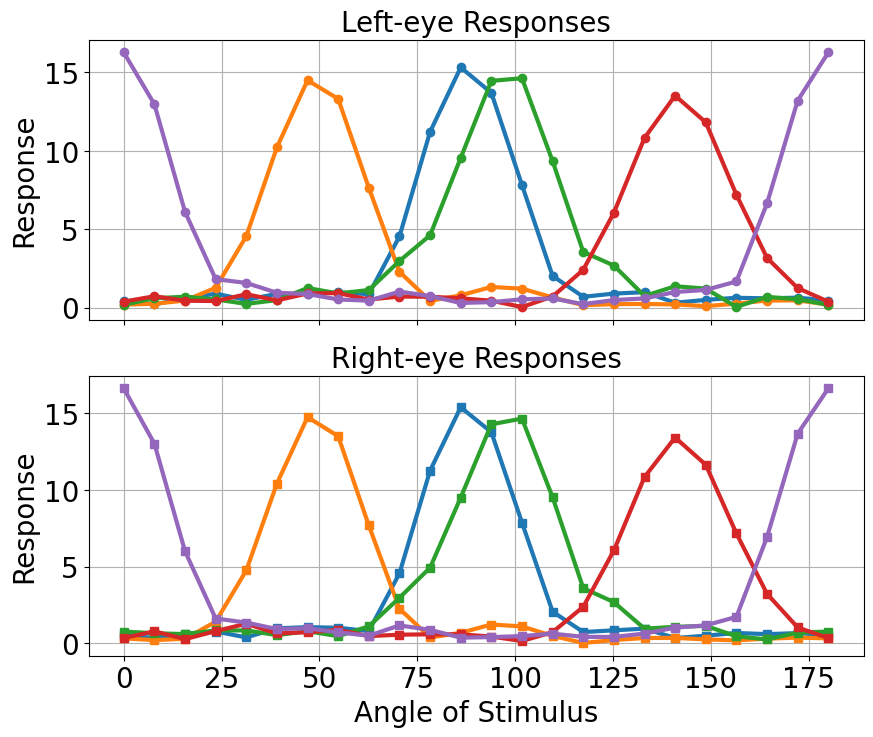

In [11]:
figure(figsize=(4,10))
R.plot_rf()

figure(figsize=(10,8))
plot(R.t/hour,R.θ,label=[f'Neuron {i}' for i in [0,1,2,3,4]])
ylabel(r'$\theta_M$')
xlabel('Time (hours)')
legend();

figure(figsize=(10,8))
t,y=R.all_responses[0]
for neuron in range(5):
    subplot(2,1,1)
    y_left=y[:,:,0,neuron,-1]  
    y_right=y[:,:,1,neuron,-1]  
    
    r,c=argmax_rc(y_left)
    tuning_curve=y_left[r,:]    
    plot(R.theta_mat,tuning_curve,'-o')
    plt.title('Left-eye Responses')
    ylabel('Response')
    gca().set_xticklabels([])
    
    subplot(2,1,2)
    r,c=argmax_rc(y_right)
    tuning_curve=y_right[r,:]
    plot(R.theta_mat,tuning_curve,'-s')    
    plt.title('Right-eye Responses')
    ylabel('Response')
    xlabel('Angle of Stimulus')
    